In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
from matplotlib.colors import LogNorm
from os.path import join

In [23]:
path_start = "/Users/dgagne/gd/Lorenz_GAN_docs/exp_20"
climate_gan_path = join(path_start, "gan_20_climate/02000000/")
climate_files = sorted(glob(climate_gan_path + "*.nc"))
climate_gan_x = []
for climate_file in climate_files:
    climate_obj = xr.open_dataset(climate_file)
    climate_gan_x.append(climate_obj["x"].values)
    climate_obj.close()
    del climate_obj

In [3]:
climate_gan_x[0].shape

(2000000, 8)

In [7]:
climate_poly_path = join(path_start, "poly_add_climate/02000000/")
climate_files = sorted(glob(climate_poly_path + "*.nc"))
climate_poly_x = []
for climate_file in climate_files:
    climate_obj = xr.open_dataset(climate_file)
    climate_poly_x.append(climate_obj["x"].values)
    climate_obj.close()
    del climate_obj

In [20]:
climate_annres_path = join(path_start, "annres_20_climate/02000000/")
climate_files = sorted(glob(climate_annres_path + "*.nc"))
climate_annres_x = []
for climate_file in climate_files:
    climate_obj = xr.open_dataset(climate_file)
    climate_annres_x.append(climate_obj["x"].values)
    climate_obj.close()
    del climate_obj

In [134]:
lorenz_data = xr.open_dataset(join(path_start, "lorenz_output.nc"))
start_index = 2000000
step_values = lorenz_data["step"].values
time_values = lorenz_data["time"].values

l_start = np.where(step_values == start_index)[0][0]
l_end = l_start + 2000000
x_vals = lorenz_data["lorenz_x"][l_start:l_end, 0].values
u_vals = lorenz_data["lorenz_y"][l_start:l_end, 0:32].sum(axis=1).values
all_x = lorenz_data["lorenz_x"][l_start:l_end].values
y_0_vals = lorenz_data["lorenz_y"][l_start:l_end, 0:32].values
#y_vals = lorenz_data["lorenz_y"].values
lorenz_data.close()


In [133]:
y_0_vals[1:] + y_0_vals[:-1]

<xarray.DataArray 'lorenz_y' (time: 1999998, y: 32)>
array([[ 0.273863,  0.384471, -0.485416, ...,  0.251544,  1.149681, -0.04241 ],
       [ 0.452451,  0.587674, -0.572186, ...,  0.26999 ,  1.167778, -0.017492],
       [ 0.685845,  0.728256, -0.628811, ...,  0.27909 ,  1.1879  ,  0.010097],
       ..., 
       [ 0.643891,  0.77801 ,  0.239594, ...,  0.070842,  0.780234,  0.77719 ],
       [ 0.553797,  0.862091,  0.240004, ..., -0.01478 ,  0.677908,  0.867587],
       [ 0.453069,  0.932882,  0.218861, ..., -0.072282,  0.52442 ,  0.927134]])
Coordinates:
  * time     (time) float64 2e+03 2e+03 2e+03 2e+03 2e+03 2e+03 2e+03 2e+03 ...
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...

In [145]:
u_avg = (0.5 * y_0_vals[1:].sum(axis=1) + y_0_vals[:-1]).sum(axis=1) 

In [159]:
u_trap = np.trapz(y_0_vals.sum(axis=1))

In [161]:
u_trap

7812648.4158967715

IndexError: invalid index to scalar variable.

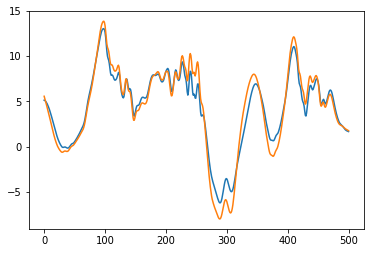

In [160]:
plt.plot(u_vals[1000:1501])
plt.plot(correct_u[1000:1501, 0])
plt.plot(u_trap[1000:1501])

In [127]:
correct_u = np.zeros((all_x.shape[0] - 1, all_x.shape[1]))
for i in range(all_x.shape[1]):
    correct_u[:, i] = (-all_x[:-1, i - 1] * (all_x[:-1, i - 2] - 
                       all_x[:-1, (i + 1) % all_x.shape[1]]) - all_x[:-1, i] + 20) - (all_x[1:, i] - all_x[:-1, i]) / 0.005

(array([    801.,   25691.,  118469.,  290443.,  322519.,  535770.,
         540149.,  144505.,   19939.,    1713.]),
 array([-15.88958155, -12.13132341,  -8.37306527,  -4.61480713,
         -0.85654899,   2.90170914,   6.65996728,  10.41822542,
         14.17648356,  17.9347417 ,  21.69299984]),
 <a list of 10 Patch objects>)

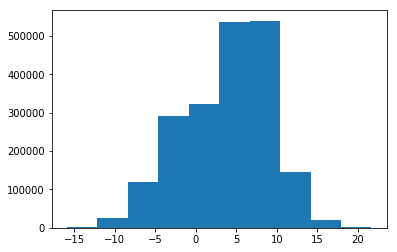

In [124]:
plt.hist(correct_u[:, 0])

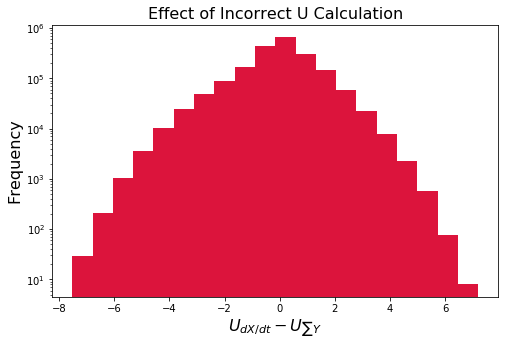

In [122]:
plt.figure(figsize=(8, 5))
plt.hist(correct_u[:, 0] - u_vals[:-1], bins=20, color="crimson")
plt.gca().set_yscale("log")
plt.xlabel("$U_{dX/dt} - U_{\sum Y}$", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Effect of Incorrect U Calculation", fontsize=16)
plt.savefig("wrong_u_hist.png", dpi=200, bbox_inches="tight")

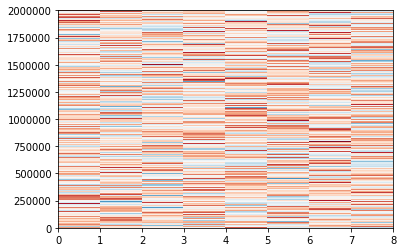

In [21]:
plt.pcolormesh(climate_annres_x[0], vmin=-30, vmax=30, cmap="RdBu_r")

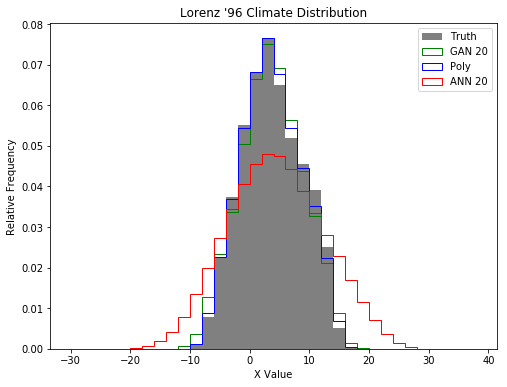

In [33]:
plt.figure(figsize=(8, 6))
c_bins = np.arange(-30, 40, 2)
plt.hist(x_vals.ravel(), bins=c_bins, color="gray", label="Truth", normed=True, cumulative=False)
plt.hist(climate_gan_x[0].ravel(), bins=c_bins, histtype="step", color="green", lw=1, label="GAN 20", normed=True, cumulative=False)
plt.hist(climate_poly_x[0].ravel(), bins=c_bins, histtype="step", color="blue", lw=1, label="Poly", normed=True, cumulative=False)
plt.hist(climate_annres_x[0].ravel(), bins=c_bins, histtype="step", color="red", lw=1, label="ANN 20", normed=True, cumulative=False)

plt.ylabel("Relative Frequency")
plt.xlabel("X Value")
plt.title("Lorenz '96 Climate Distribution")
plt.legend()
plt.savefig("lorenz_climate_dist.png", dpi=250, bbox_inches="tight")

In [27]:
truth_hist, _ = np.histogram(x_vals.ravel(), bins=c_bins, normed=True)
gan_hist, _ = np.histogram(climate_gan_x[0].ravel(), bins=c_bins, normed=True)
poly_hist, _ = np.histogram(climate_poly_x[0].ravel(), bins=c_bins, normed=True)
annres_hist, _ = np.histogram(climate_annres_x[0].ravel(), bins=c_bins, normed=True)

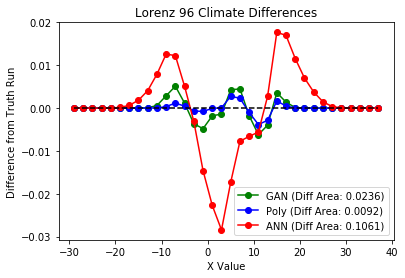

In [30]:
plt.figure(figsize=(6, 4))
bin_centers = (c_bins[1:] + c_bins[:-1]) / 2
gan_diff_area = np.sum(np.abs(gan_hist - truth_hist)) / 2
poly_diff_area = np.sum(np.abs(poly_hist - truth_hist)) / 2
annres_diff_area = np.sum(np.abs(annres_hist - truth_hist)) / 2
plt.plot(bin_centers, gan_hist - truth_hist, 'go-', label="GAN 20 (Diff Area: {0:0.4f})".format(gan_diff_area))
plt.plot(bin_centers, poly_hist - truth_hist, 'bo-', label="Poly (Diff Area: {0:0.4f})".format(poly_diff_area))
plt.plot(bin_centers, annres_hist - truth_hist, 'ro-', label="ANN 20 (Diff Area: {0:0.4f})".format(annres_diff_area))

plt.plot(bin_centers, np.zeros(bin_centers.shape), 'k--')
plt.legend()
plt.xlabel("X Value")
plt.ylabel("Difference from Truth Run")
plt.title("Lorenz 96 Climate Differences")
plt.savefig("lorenz_climate_dist_diff.png", dpi=250, bbox_inches="tight")

<Container object of 34 artists>

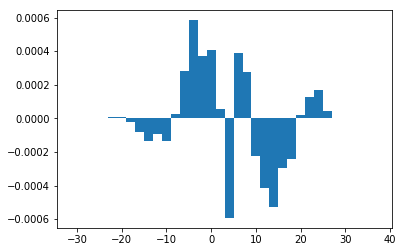

In [28]:
plt.bar(c_bins[:-1], poly_hist - truth_hist, 2)

In [3]:
path_start = "/Users/dgagne/gd/Lorenz_GAN_docs/exp_20"
models = ["poly_add_climate", "annres_20_climate", "annres_00_climate", 
          "gan_40_climate", "gan_20_climate", "gan_00_climate"]
run = "02000000"
all_data = {}
for model in models:
    model_path = join(path_start, model, run)
    model_file = glob(model_path + "/*.nc")[0]
    all_data[model] = xr.open_dataset(model_file)

In [5]:
long_model_names = ["Polynomial", "ANN 20% Dropout", "ANN No Dropout", "GAN 40% Dropout", "GAN 20% Dropout", "GAN No Dropout"]

In [39]:
x_bins = np.arange(-20, 26, 2)
u_bins = np.arange(-20, 30, 2)
true_hist, xb, ub = np.histogram2d(x_vals, u_vals, bins=(x_bins, u_bins))
true_hist = np.where(true_hist == 0, np.nan, true_hist)

0 Axes(0.125,0.536818;0.227941x0.343182)
1 Axes(0.398529,0.536818;0.227941x0.343182)
2 Axes(0.672059,0.536818;0.227941x0.343182)
3 Axes(0.125,0.125;0.227941x0.343182)
4 Axes(0.398529,0.125;0.227941x0.343182)
5 Axes(0.672059,0.125;0.227941x0.343182)


/Users/dgagne/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


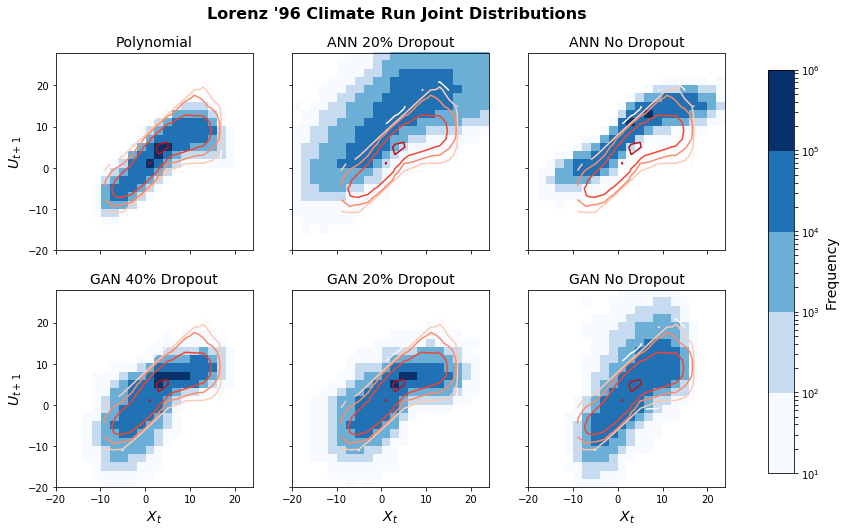

In [100]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
x_bins = np.arange(-20, 26, 2)
u_bins = np.arange(-20, 30, 2)
for a, ax in enumerate(axes.ravel()):
    print(a, ax)
    h, xb, yb, ha = ax.hist2d(all_data[models[a]]["x"][:-1, 0].values, all_data[models[a]]["u"][1:, 0].values, bins=(x_bins, u_bins),
              cmin=1, norm=LogNorm(10, 1000000), cmap=plt.get_cmap("Blues", 5))
    ax.contour(0.5 * (x_bins[:-1] + x_bins[1:]), 0.5 * (u_bins[:-1] + u_bins[1:]), true_hist.T, 
               np.array([10, 100, 1000, 10000, 100000, 1000000]),
               norm=LogNorm(10, 1000000), cmap="Reds")
    ax.set_title(long_model_names[a], fontsize=14)
    if a > 2:
        ax.set_xlabel("$X_t$", fontsize=14)
    if a in [0, 3]:
        ax.set_ylabel("$U_{t+1}$", fontsize=14)
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(ha, cax=cbar_ax, )
cbar_ax.set_ylabel("Frequency", fontsize=14)
fig.suptitle("Lorenz '96 Climate Run Joint Distributions", fontsize=16, fontweight="bold", x=0.52, y=0.96)
plt.savefig("l96_climate_joint_hist.png", dpi=200, bbox_inches="tight")

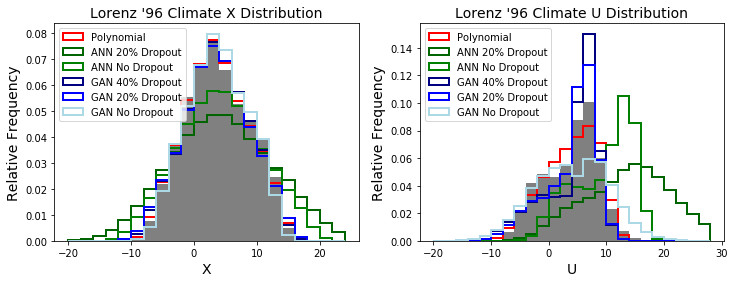

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
var_names = ["x", "u"]
true_vals = [x_vals, u_vals]
bin_vals = [x_bins, u_bins]
m_colors = ["red", "darkgreen", "green", "navy", "blue", "lightblue"]
for a, ax in enumerate(axes):
    ax.hist(true_vals[a], color="gray", bins=bin_vals[a], normed=True)
    for m, model in enumerate(models):
        ax.hist(all_data[model][var_names[a]][:, 0].values, histtype="step", 
                color=m_colors[m], bins=bin_vals[a], lw=2, normed=True, label=long_model_names[m])
    ax.set_xlabel(var_names[a].upper(), fontsize=14)
    ax.set_ylabel("Relative Frequency", fontsize=14)
    ax.set_title("Lorenz '96 Climate {0} Distribution".format(var_names[a].upper()), fontsize=14)
    ax.legend()
plt.savefig("l96_climate_marginal_hist.png", dpi=200, bbox_inches="tight")

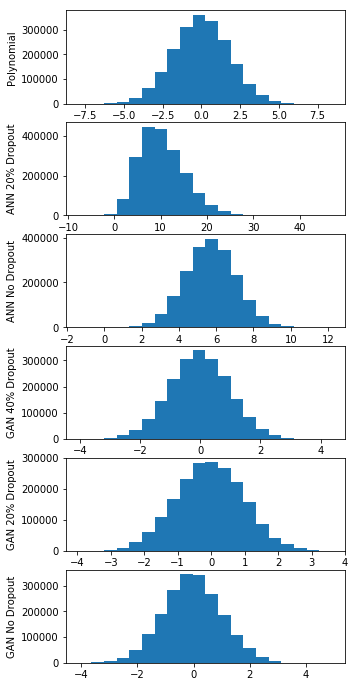

In [102]:
plt.figure(figsize=(5, 12))
for m, model in enumerate(models):
    plt.subplot(6, 1, m + 1)
    plt.hist(all_data[model]["u_res"][:-1, 0].values, bins=20)
    plt.ylabel(long_model_names[m])
plt.savefig("l96_climate_u_res_hist.png", dpi=200, bbox_inches="tight")

In [98]:
lags = np.arange(1, 200)
x_lag_corrs = np.zeros((len(models), lags.size))
for m, model in enumerate(models):
    print(model)
    model_x_values = all_data[model]["x"][:, 0].values
    for l, lag in enumerate(lags):
        x_lag_corrs[m, l] = np.corrcoef(model_x_values[:-lag], 
                                        model_x_values[lag:])[0, 1]

poly_add_climate
annres_20_climate
annres_00_climate
gan_40_climate
gan_20_climate
gan_00_climate


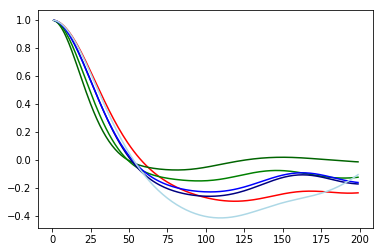

In [99]:
for m, model in enumerate(models):
    plt.plot(lags, x_lag_corrs[m], color=m_colors[m])


In [88]:
np.corrcoef(x_vals[:-1], x_vals[1:])

array([[ 1.       ,  0.9993089],
       [ 0.9993089,  1.       ]])